In [1]:
import swarms
import pread as pr
import numpy as np
import matplotlib.pyplot as plt
from pread import BaraffeModelFixedTime, BaraffeModelFixedMass

try:
    plt.style.use('paper')
except:
    pass

In [2]:
Lsun = 3.828e26 # all units in SI
Msun = 1.989e30 
Tsun = 5800
pc = 3.086e16
AU = 1.496e11
Mearth = 5.972e24
Rearth = 6.4e6
Rjup = 7.e7
Mjup = 318 * Mearth
Jansky = 1.e-26
Year = 3.154e7 # seconds

lambdas = np.logspace(-7, -3, 200)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

time = 3.e7 * Year # seconds
star = swarms.Star(L=Lsun, M=Msun, T=Tsun, d=10*pc)
earth = swarms.Planet(star, M=Mearth, R=Rearth, a=1*AU, Q=0.3)
jup = swarms.Planet(star, M=Mjup, R=Rjup, a=1*AU, Q=0.5)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*Mjup, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

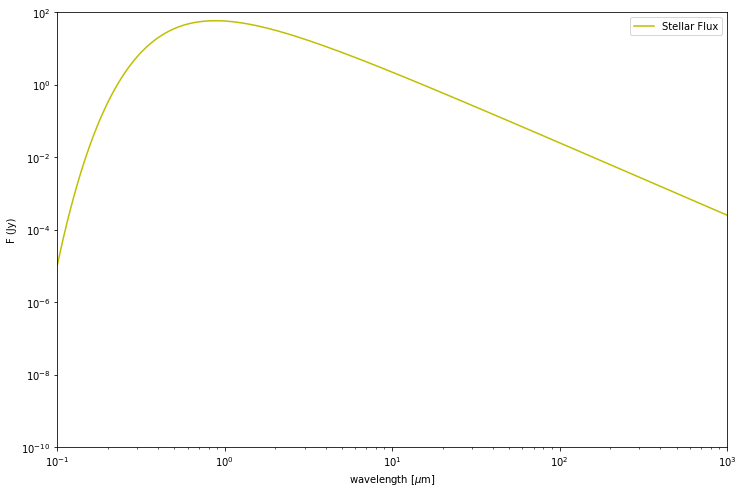

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()
#fig.savefig('/Users/dtamayo/Desktop/f1.png', bbox_inches='tight')

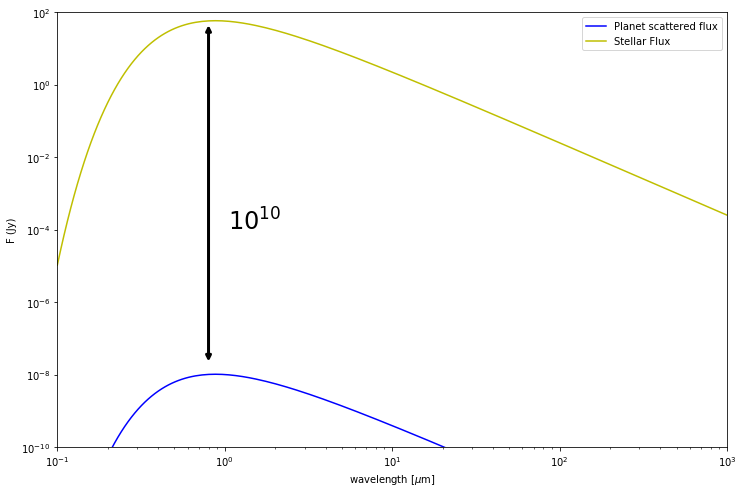

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.annotate(s='', xy=(0.8,2.e-8), xytext=(0.8,5.e1), arrowprops=dict(arrowstyle='<->', lw=3))
ax.text(1.05, 1.e-4, r'$10^{10}$', fontsize=24)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

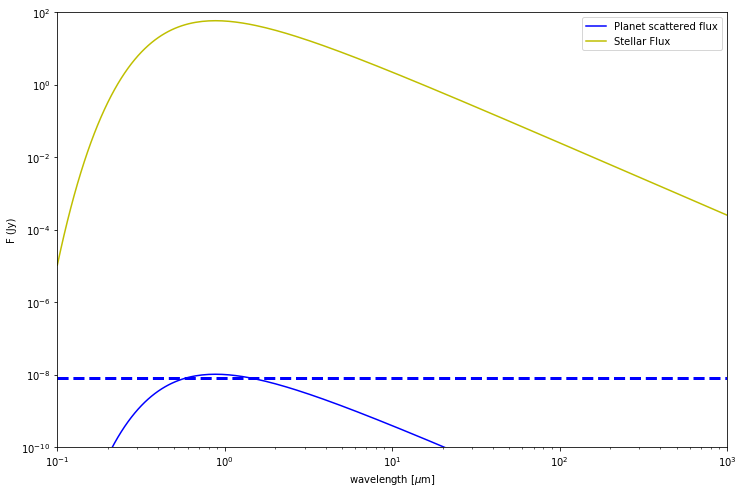

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

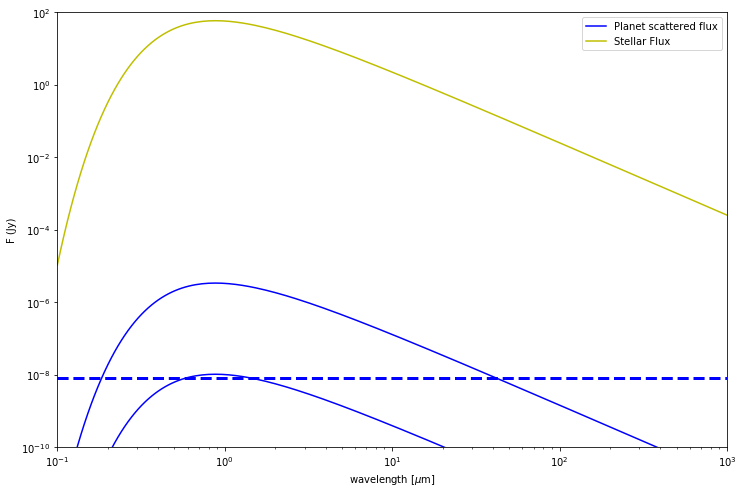

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

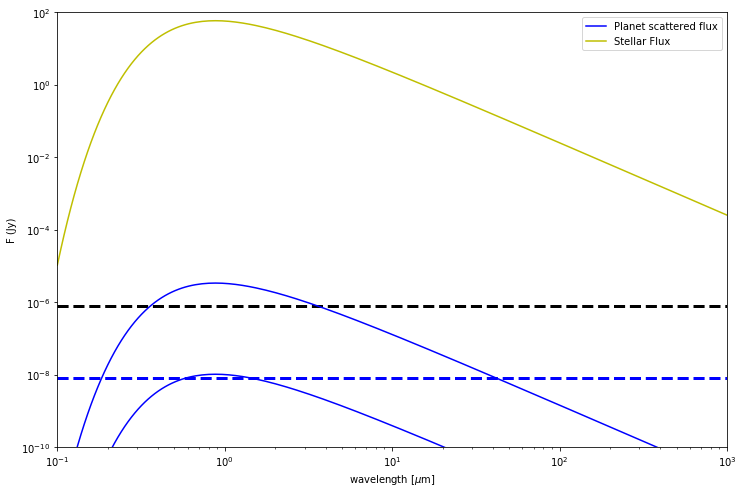

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

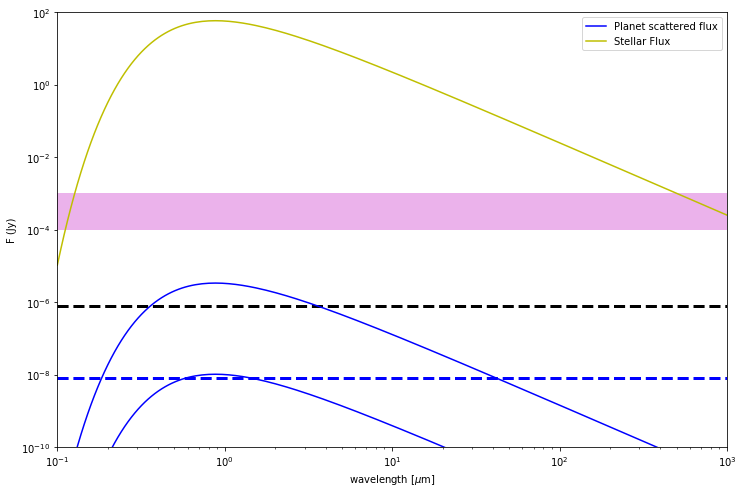

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, earth.Fscat(lambdas, g)/Jansky, 'b', label="Planet scattered flux")
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

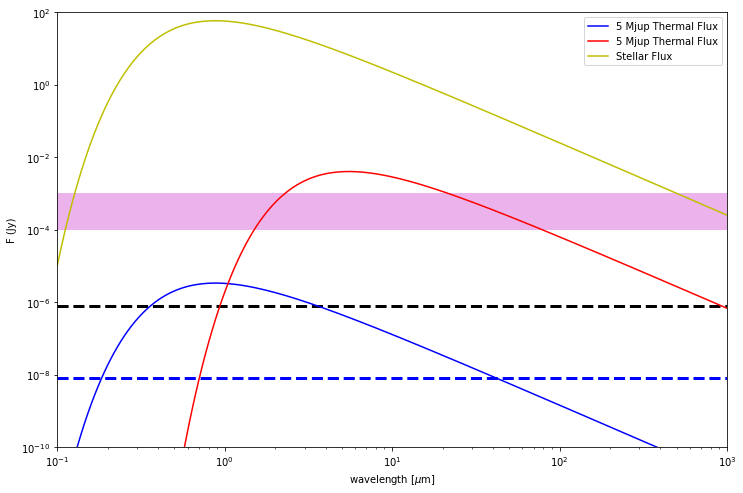

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, supjup.Fthermal(lambdas)/Jansky, 'r', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()

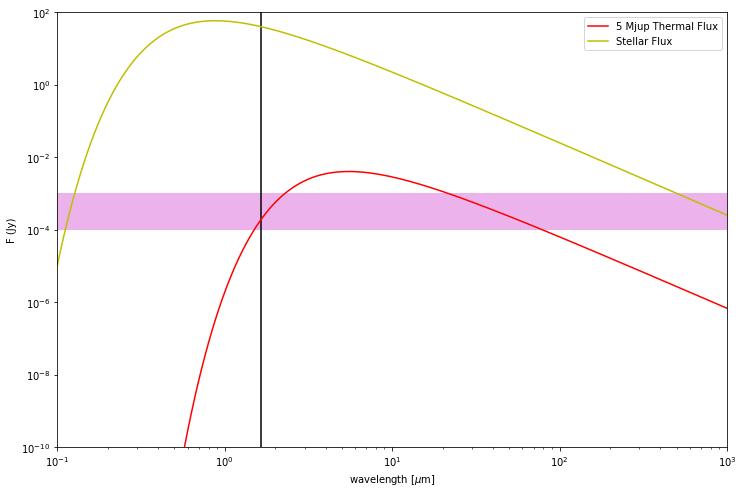

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.loglog(lambdas*1e6, supjup.Fscat(lambdas, g)/Jansky, 'b', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, supjup.Fthermal(lambdas)/Jansky, 'r', label='5 Mjup Thermal Flux')
ax.loglog(lambdas*1e6, star.F(lambdas, star.d)/Jansky, 'y', label="Stellar Flux")

#ax.hlines(8.e-9, 1.e-1, 1e3, lw=3, linestyle='--', color='b')
#ax.hlines(8.e-7, 1.e-1, 1e3, lw=3, linestyle='--', color='k')
ax.fill_between(lambdas*1e6, 1.e-4, 1.e-3, facecolor='m', alpha=0.3)
ax.vlines(1.65, 1.e-10, 1e3, color='k')
ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.set_xlim([1.e-1, 1.e3])
ax.legend()